# 0. MNIST Dataset

# 1. Preparation

In [ ]:
# Import module
import keras
keras.__version__

'2.12.0'

# 2. Preparation

In [ ]:
# Load a dataset
from keras.datasets import mnist  # 'mnist' dataset: Handwriting dataset

# Check the dataset
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
# Define Train and Test Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 3. Check Data

## 3.1. Check Dataset

In [ ]:
# Check a shape of train images
train_images.shape

# Result: (60000, 28, 28) 
#        - Total number of images: 60000
#        - Size: 28px * 28px

(60000, 28, 28)

In [ ]:
# Check a shape of labels
train_labels.shape

(60000,)

In [ ]:
# Check a shape of test images
test_images.shape

(10000, 28, 28)

## 3.2. Check Data

In [ ]:
# Import modules
import matplotlib.pyplot as plt

digit = train_images[4]
print(digit)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [ ]:
# Check a dimension
print(train_images.ndim)

3


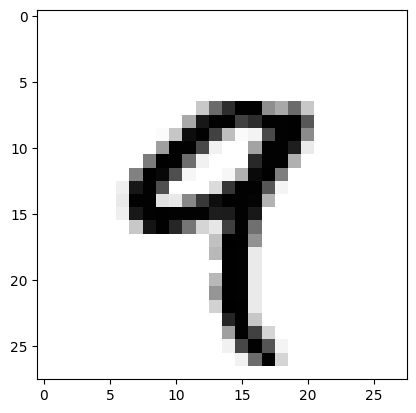

In [ ]:
# Show an image
plt.imshow(digit, cmap=plt.cm.binary)

# 4. Train the Dataset

In [ ]:
# Import modules
from keras import models
from keras import layers

## 4.1. Create a Neural Network

In [ ]:
# Make a model using ReLU and Softmax
network = models.Sequential()

# Input Layer
network.add(layers.Dense(512, # Number of images in Input Layer
                         activation='relu',input_shape=(28*28,))) 

# Output Layer
network.add(layers.Dense(10,   # Number of images in Output Layer -> (0 - 9)
                         activation = 'softmax'))   

# Complie
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## 4.2. Prepare Data

In [ ]:
# Prepare Data
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [ ]:
# Transfer Label Data to Categorical Data
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## 4.3. Fit the Nueral Network

In [ ]:
network.fit(train_images,
            train_labels,
            epochs = 5,         # epochs: Number of fit cycle 
            batch_size = 128)   # batch_size: Number of training

Epoch 1/5
120/120 [==============================] - 4s 31ms/step - loss: 0.0218 - accuracy: 0.9944
Epoch 2/5
120/120 [==============================] - 3s 24ms/step - loss: 0.0177 - accuracy: 0.9961
Epoch 3/5
120/120 [==============================] - 4s 31ms/step - loss: 0.0150 - accuracy: 0.9967
Epoch 4/5
120/120 [==============================] - 6s 47ms/step - loss: 0.0125 - accuracy: 0.9978
Epoch 5/5
120/120 [==============================] - 3s 24ms/step - loss: 0.0102 - accuracy: 0.9984


In [ ]:
network.fit(train_images,
            train_labels,
            epochs = 5,         # epochs: Number of fit cycle 
            batch_size = 60)   # batch_size: Number of training

Epoch 1/5
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0227 - accuracy: 0.9926
Epoch 2/5
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0171 - accuracy: 0.9948
Epoch 3/5
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0134 - accuracy: 0.9957
Epoch 4/5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0105 - accuracy: 0.9970
Epoch 5/5
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0081 - accuracy: 0.9976


In [ ]:
network.fit(train_images,
            train_labels,
            epochs = 5,         # epochs: Number of fit cycle 
            batch_size = 500)   # batch_size: Number of training

Epoch 1/5
120/120 [==============================] - 3s 25ms/step - loss: 0.0025 - accuracy: 0.9996
Epoch 2/5
120/120 [==============================] - 4s 32ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 3/5
120/120 [==============================] - 6s 53ms/step - loss: 9.1755e-04 - accuracy: 0.9999
Epoch 4/5
120/120 [==============================] - 3s 25ms/step - loss: 6.9982e-04 - accuracy: 1.0000
Epoch 5/5
120/120 [==============================] - 3s 25ms/step - loss: 6.2259e-04 - accuracy: 1.0000


# 5. Test

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0646 - accuracy: 0.9836
test acc: 0.9836000204086304
